In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score, classification_report
from sklearn.metrics import precision_score,recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [2]:
#Before balanced data the file is stored into data
data = pd.read_csv('data.csv')
#data
#After Balanced data the file is stored into df
df = pd.read_csv('preprocessed_data.csv')
#df

In [3]:
data.head(7)
df.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
0,859283,1,14.78,23.94,97.40,668.3,0.11720,0.1479,0.12670,0.09029,...,17.31,33.39,114.6,925.1,0.1648,0.3416,0.3024,0.1614,0.3321,0.08911
1,897630,1,18.77,21.43,122.90,1092.0,0.09116,0.1402,0.10600,0.06090,...,24.54,34.37,161.1,1873.0,0.1498,0.4827,0.4634,0.2048,0.3679,0.09870
2,869104,1,16.11,18.05,105.10,813.0,0.09721,0.1137,0.09447,0.05943,...,19.92,25.27,129.0,1233.0,0.1314,0.2236,0.2802,0.1216,0.2792,0.08158
3,856106,1,13.28,20.28,87.32,545.2,0.10410,0.1436,0.09847,0.06158,...,17.38,28.00,113.1,907.2,0.1530,0.3724,0.3664,0.1492,0.3739,0.10270
4,88299702,1,23.21,26.97,153.50,1670.0,0.09509,0.1682,0.19500,0.12370,...,31.01,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677
5,852973,1,15.30,25.27,102.40,732.4,0.10820,0.1697,0.16830,0.08751,...,20.27,36.71,149.3,1269.0,0.1641,0.6110,0.6335,0.2024,0.4027,0.09876
6,874858,1,14.22,23.12,94.37,609.9,0.10750,0.2413,0.19810,0.06618,...,15.74,37.18,106.4,762.4,0.1533,0.9327,0.8488,0.1772,0.5166,0.14460


In [4]:
#removes null values
data.dropna()
# data 

df.dropna()
# df 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
0,859283,1,14.780,23.94,97.40,668.3,0.11720,0.14790,0.12670,0.09029,...,17.31,33.39,114.60,925.1,0.16480,0.34160,0.30240,0.16140,0.3321,0.08911
1,897630,1,18.770,21.43,122.90,1092.0,0.09116,0.14020,0.10600,0.06090,...,24.54,34.37,161.10,1873.0,0.14980,0.48270,0.46340,0.20480,0.3679,0.09870
2,869104,1,16.110,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.05943,...,19.92,25.27,129.00,1233.0,0.13140,0.22360,0.28020,0.12160,0.2792,0.08158
3,856106,1,13.280,20.28,87.32,545.2,0.10410,0.14360,0.09847,0.06158,...,17.38,28.00,113.10,907.2,0.15300,0.37240,0.36640,0.14920,0.3739,0.10270
4,88299702,1,23.210,26.97,153.50,1670.0,0.09509,0.16820,0.19500,0.12370,...,31.01,34.51,206.00,2944.0,0.14810,0.41260,0.58200,0.25930,0.3103,0.08677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,925311,0,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905
420,859464,0,9.465,21.01,60.11,269.4,0.10440,0.07773,0.02172,0.01504,...,10.41,31.56,67.03,330.7,0.15480,0.16640,0.09412,0.06517,0.2878,0.09211
421,912558,0,13.700,17.64,87.76,571.1,0.09950,0.07957,0.04548,0.03160,...,14.96,23.53,95.78,686.5,0.11990,0.13460,0.17420,0.09077,0.2518,0.06960
422,91376701,0,12.250,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,...,14.17,31.99,92.74,622.9,0.12560,0.18040,0.12300,0.06335,0.3100,0.08203


In [5]:
print(data.isna().sum())
print(data.describe())

print(df.isna().sum())
print(df.describe())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
data.corr()
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.009675,0.054108,0.094970,0.052211,0.080853,-0.057216,-0.021381,0.035968,0.020904,...,0.063061,0.063404,0.060755,0.092574,-0.007494,-0.017936,0.011757,0.013351,-0.069297,-0.033120
diagnosis,0.009675,1.000000,0.721727,0.428226,0.733521,0.686030,0.368557,0.583350,0.682824,0.763676,...,0.761533,0.468935,0.767166,0.705207,0.424209,0.566031,0.666143,0.794803,0.415767,0.301802
radius_mean,0.054108,0.721727,1.000000,0.343127,0.997731,0.988133,0.159293,0.492227,0.684391,0.825970,...,0.967110,0.301330,0.962917,0.940638,0.111499,0.379346,0.528974,0.739318,0.156531,-0.014621
texture_mean,0.094970,0.428226,0.343127,1.000000,0.348911,0.331998,0.001079,0.238926,0.308711,0.304364,...,0.366849,0.905352,0.372839,0.351284,0.098288,0.278698,0.317455,0.310268,0.117432,0.112737
perimeter_mean,0.052211,0.733521,0.997731,0.348911,1.000000,0.986850,0.198807,0.544783,0.724764,0.854887,...,0.966495,0.307025,0.968005,0.940193,0.143450,0.422623,0.567355,0.766757,0.181991,0.029853
area_mean,0.080853,0.686030,0.988133,0.331998,0.986850,1.000000,0.167201,0.480339,0.686878,0.821958,...,0.958131,0.283179,0.954619,0.955572,0.108087,0.350249,0.505998,0.711477,0.125654,-0.026699
smoothness_mean,-0.057216,0.368557,0.159293,0.001079,0.198807,0.167201,1.000000,0.679446,0.553595,0.560340,...,0.205573,0.066202,0.234441,0.198060,0.808157,0.496687,0.470237,0.512291,0.398591,0.531776
compactness_mean,-0.021381,0.583350,0.492227,0.238926,0.544783,0.480339,0.679446,1.000000,0.883559,0.824295,...,0.519524,0.243889,0.577274,0.489342,0.575960,0.860233,0.828863,0.812690,0.519695,0.688875
concavity_mean,0.035968,0.682824,0.684391,0.308711,0.724764,0.686878,0.553595,0.883559,1.000000,0.929037,...,0.687097,0.291319,0.730312,0.668683,0.449458,0.726557,0.874055,0.855426,0.401784,0.486886
concave.points_mean,0.020904,0.763676,0.825970,0.304364,0.854887,0.821958,0.560340,0.824295,0.929037,1.000000,...,0.828286,0.293207,0.855080,0.803258,0.443029,0.640971,0.759359,0.906227,0.372224,0.346554


In [7]:
data = data.drop('Unnamed: 32', axis=1)

In [8]:
data.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
#for before balanced data
X = data[["radius_mean","texture_mean","smoothness_mean","compactness_mean","concavity_mean"]]
Y = data['diagnosis']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
#For after balanced data
x = df[["radius_mean","texture_mean","smoothness_mean","compactness_mean","concavity_mean"]]
y = df['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

k = 5
#For before balanced data it is KNN
KNN = KNeighborsClassifier(n_neighbors=k)
#For after balanced data it is KNN
knn = KNeighborsClassifier(n_neighbors=k)
# Example of label encoding the diagnosis column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])
df['diagnosis'] = le.fit_transform(df['diagnosis'])
KNN.fit(X_train, Y_train)
knn.fit(x_train, y_train)

In [13]:
Y_pred = KNN.predict(X_test)
y_pred = knn.predict(x_test)


C:\Users\geeth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\geeth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [18]:
# Map 'B' and 'M' to numerical values, e.g., 0 and 1
label_mapping = {'B': 0, 'M': 1}
# Map the true labels to numerical values
y_true_numeric = np.array([label_mapping[label] for label in Y_test])
# Map the predicted labels to numerical values
y_pred_numeric = np.array([label_mapping[label] for label in Y_pred])

accuracy_B = accuracy_score(Y_test, Y_pred)
F1_knn = f1_score(y_true_numeric, y_pred_numeric)
Precision_knn = precision_score(y_true_numeric, y_pred_numeric)
Recall_knn = recall_score(y_true_numeric, y_pred_numeric)
Confus_knn = confusion_matrix(y_true_numeric, y_pred_numeric)
print('Before Balancing the dataset')
print('Recall:',Recall_knn)
print('Precision:',Precision_knn)
print('f1_score:',F1_knn)
print('Accuracy:',accuracy_B)
print("confusion matrix: ",Confus_knn)
accuracy = accuracy_score(y_test, y_pred)

f1_knn = f1_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
confus_knn = confusion_matrix(y_test, y_pred)
print('After Balancing the dataset')
print('Recall:',recall_knn)
print('Precision:',precision_knn)
print('f1_score:',f1_knn)
print('Accuracy:',accuracy)
print("confusion matrix: ",confus_knn)

Before Balancing the dataset
Recall: 0.7761194029850746
Precision: 0.8387096774193549
f1_score: 0.8062015503875968
Accuracy: 0.8670212765957447
confusion matrix:  [[111  10]
 [ 15  52]]
After Balancing the dataset
Recall: 0.8289473684210527
Precision: 0.9692307692307692
f1_score: 0.8936170212765957
Accuracy: 0.8928571428571429
confusion matrix:  [[62  2]
 [13 63]]


In [15]:

# Compute the ROC curve
fpr_before, tpr_before, _ = roc_curve(y_true_numeric, y_pred_numeric)

# fpr_before, tpr_before, _ = roc_curve(Y_test, Y_pred)
fpr_after, tpr_after, _ = roc_curve(y_test, y_pred)

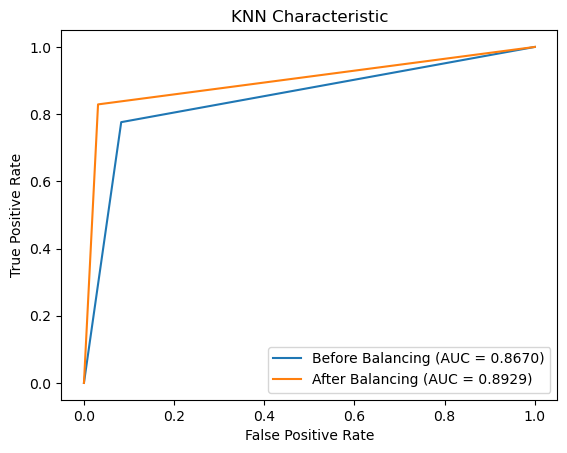

In [16]:
# Plot the ROC curves
plt.figure()
plt.plot(fpr_before, tpr_before, label=f'Before Balancing (AUC = {accuracy_B:.4f})')
plt.plot(fpr_after, tpr_after, label=f'After Balancing (AUC = {accuracy:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Characteristic')
plt.legend()
plt.show()

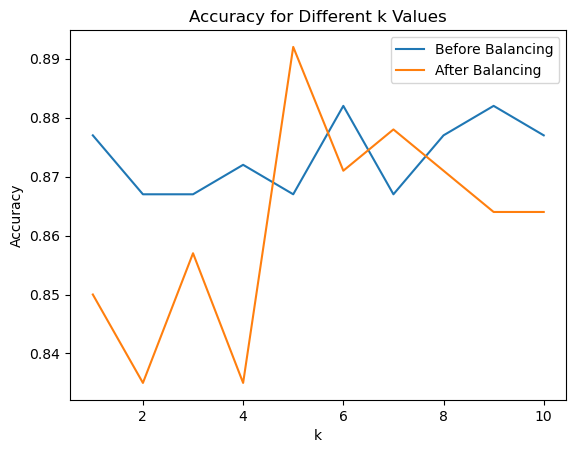

In [17]:
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracy_before = [0.877,0.867,0.867,0.872,0.867,0.882,0.867,0.877,0.882,0.877]
accuracy_after = [0.85,0.835,0.857,0.835,0.892,0.871,0.878,0.871,0.864,0.864]
plt.plot(k_values, accuracy_before, label='Before Balancing')
plt.plot(k_values, accuracy_after, label='After Balancing')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different k Values')
plt.legend()
plt.show()